# Building BlockChain in Python 

## What is BlockChain ?

BlockChain is a public database where new data is stored in a container called a **block** and these blocks are added to form an immutable chain (hence blockchain) with data added in the past.In the case of Bitcoin and other cryptocurrencies, these data are groups of transactions.

Blockchain technology has given rise to new, fully digital currencies like Bitcoin and Litecoin that **aren’t issued or managed by a central authority**. This brings new freedom to individuals who believe that today’s banking systems are a scam or subject to failure.

### Importing the required libraries

In [1]:
# Installing hashlib module
#pip install hashlib

import hashlib as hasher
import datetime as date
import pandas as pd

### What is hash and hash fuction ?  

Hash function takes a block of data and returns a fixed-size bit string (hash value). The data used by hash functions is referred to as a "message", while the computed hash value is referred to as the "message digest".

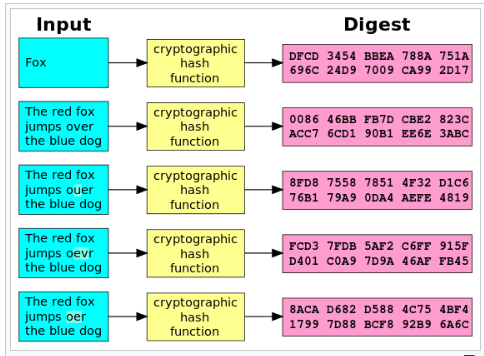

In [2]:
# message is 'Fox' which is being converted into hash using sha1 has function
hasher.sha1('Fox'.encode('utf-8')).hexdigest()

'dfcd3454bbea788a751a696c24d97009ca992d17'

### Defining how our block looks like

In blockchain, each block has the following features :

**1. Index (Optional)**  
**2. Timestamp**  
**3. Data**   
**4. Self-identifying hash (to ensure integrity)**
 
Each block’s hash will be a dependent on the block’s index, timestamp, data, and the hash of the previous block. 

In [3]:
class Block:            # Defining a class Block
    
    def __init__(self, index, timestamp, data, previous_hash):
        self.index = index                          # Storing the index of the block
        self.timestamp = timestamp                  # Storing the timestamp of the block
        self.data = data                            # Storing the data of the block
        self.previous_hash = previous_hash          # Hash of the previous block
        self.hash = self.hash_block()               

    # Function which creates hash of a block based on index , timestamp , data and previous hash of the block. 
    def hash_block(self):
        sha = hasher.sha256()
        sha.update(str(self.index).encode('utf-8') + 
                   str(self.timestamp).encode('utf-8') + 
                   str(self.data).encode('utf-8') + 
                   str(self.previous_hash).encode('utf-8'))
        return sha.hexdigest()

### Defining our first block

The question arises is how to define the first (genesis) block as each block's hash depends on the hash of the previous block as previous block does not exist in case of first block.

To simplify things , we are just going to assign previous block's hash (remember previous to the first block) an arbitrary value. 

In [4]:
def create_genesis_block():
    
  # Manually constructing our first (genesis) block
               
    return Block(0,                      # Index zero
                 date.datetime.now(),    # Current timestamp
                "Genesis Block",         # Data inside the block 
                 "0")                    # Arbitrary previous hash

## Function to generate subsequent blocks in the BlockChain

It is nice to create a single block but in order to create a blockchain , we need to start adding blocks to the actual chain.

This function will take the previous block in the chain as a parameter, create the data for the block to be generated, and return the new block with its appropriate data.

In [5]:
def next_block(last_block):             # Function recieves the previous block in the chain as parameter
    this_index = last_block.index + 1                               # Index has been updated by adding 1 to it
    this_timestamp = date.datetime.now()                            # Current timestamp is stored
    this_data = "Hey! I'm block " + str(this_index)                 # Data contains a string
    this_hash = last_block.hash                                     # Hash value of last block is stored 
    return Block(this_index, this_timestamp, this_data, this_hash)  # Class object is returned (init will be called)

### Creating a Blockhain of 20 Blocks

In [6]:
# Creating the blockchain and adding the genesis block
blockchain = [create_genesis_block()]
previous_block = blockchain[0]

In [7]:
# Printing details of the genesis block of the blockchain
print("Index of the block is : " , previous_block.index)
print("Data inside the block {} is : {} " .format(previous_block.index , previous_block.data))
print("Creation timestamp of block {} is : {} " .format(previous_block.index , previous_block.timestamp))
print("Hash of the previous block {} is : {} " .format(previous_block.index , previous_block.previous_hash))
print("Hash of the current block {} is : {} " .format(previous_block.index , previous_block.hash))

Index of the block is :  0
Data inside the block 0 is : Genesis Block 
Creation timestamp of block 0 is : 2020-06-13 03:40:35.686140 
Hash of the previous block 0 is : 0 
Hash of the current block 0 is : de94156d0f3ca62e081427feb37ff8e756454262bf0cfa246d32fb8b37284e48 


In [8]:
# No of blocks to add to the chain after the genesis block
num_of_blocks_to_add = 20

# Adding blocks to the chain
for i in range(0, num_of_blocks_to_add):          # looping 20 times to add 20 blocks to the chain
    
    block_to_add = next_block(previous_block)     # Generating the data for the successive block
    blockchain.append(block_to_add)               # Appending the result to the list  
    previous_block = block_to_add                 # Making the last added block as the previous block

    print("Block #{} has been added to the blockchain!".format(block_to_add.index)) 
    print("Hash: {}\n".format(block_to_add.hash))

Block #1 has been added to the blockchain!
Hash: 5aa5b2a9ba88c82e519bb1d6c3771ee93f7a9a8044b5b75fd0772845e26f7f45

Block #2 has been added to the blockchain!
Hash: e6f850370d90bee02126d5d2f81c5d84f6a02a4a4c0624dd2954142bd4d6e404

Block #3 has been added to the blockchain!
Hash: c0247b464e52058b39ee5acd8c963ef793abff95cf38c987cf98a767d1f7f7e5

Block #4 has been added to the blockchain!
Hash: bc28a8770538213dd5e6ca18ac1e7d3c5ea17412e758d80088e653cb0c8a672e

Block #5 has been added to the blockchain!
Hash: 33464a6d40efaca7c3f2047cc374156ae5524a20d31a17513768fbf8b9e75286

Block #6 has been added to the blockchain!
Hash: d960d0037108077fb65faa2ce5da0b40f1c0826a53a3c14b3b3b480ce2253101

Block #7 has been added to the blockchain!
Hash: 610ab629c585dae8ec51d177dc4b7e108ac35a8713a8e72ad48a2fbcb2232a31

Block #8 has been added to the blockchain!
Hash: b66d1224db905d686acaeb9b316b7e833c2d3f65bbf6412b28b56ba0748de2f4

Block #9 has been added to the blockchain!
Hash: 2473b0636b688df6a7f447cb7f2ec0e

### Create a dataframe for better visualization of the values in our blocks

In [9]:
# Creating an empty dataframe 
data = pd.DataFrame([])

for i in range(0,num_of_blocks_to_add+1):                       # looping for 21 times to add 20 + 1 blocks to the chain

    Index = blockchain[i].index                                 # Storing index values belonging to each of the blocks  
    Timestamp = blockchain[i].timestamp                         # Storing timestamp values belonging to each of the blocks
    Data = blockchain[i].data                                   # Storing data belonging to each of the blocks
    Hash = blockchain[i].hash                                   # Storing Hash values belonging to each of the blocks
    Previous_Hash = blockchain[i].previous_hash                 # Storing previous hash values belonging to each of the blocks
    data = data.append(pd.DataFrame({'Block_Index' : Index ,    # Appending all the values in a dataframe
                  'Timestamp' : Timestamp , 
                  'Data' : Data , 
                  'Hash' : Hash , 
                  'Previous_Block_Hash' : Previous_Hash} , index = [0]))
    
# Resetting the index    
data = data.set_index('Block_Index')    

In [10]:
# Inspecting the dataframe
data

,Timestamp,Data,Hash,Previous_Block_Hash
Block_Index,,,,
0,2020-06-13 03:40:35.686140,Genesis Block,de94156d0f3ca62e081427feb37ff8e756454262bf0cfa...,0
1,2020-06-13 03:40:36.008278,Hey! I'm block 1,5aa5b2a9ba88c82e519bb1d6c3771ee93f7a9a8044b5b7...,de94156d0f3ca62e081427feb37ff8e756454262bf0cfa...
2,2020-06-13 03:40:36.010636,Hey! I'm block 2,e6f850370d90bee02126d5d2f81c5d84f6a02a4a4c0624...,5aa5b2a9ba88c82e519bb1d6c3771ee93f7a9a8044b5b7...
3,2020-06-13 03:40:36.011270,Hey! I'm block 3,c0247b464e52058b39ee5acd8c963ef793abff95cf38c9...,e6f850370d90bee02126d5d2f81c5d84f6a02a4a4c0624...
4,2020-06-13 03:40:36.011270,Hey! I'm block 4,bc28a8770538213dd5e6ca18ac1e7d3c5ea17412e758d8...,c0247b464e52058b39ee5acd8c963ef793abff95cf38c9...
5,2020-06-13 03:40:36.012267,Hey! I'm block 5,33464a6d40efaca7c3f2047cc374156ae5524a20d31a17...,bc28a8770538213dd5e6ca18ac1e7d3c5ea17412e758d8...
6,2020-06-13 03:40:36.012267,Hey! I'm block 6,d960d0037108077fb65faa2ce5da0b40f1c0826a53a3c1...,33464a6d40efaca7c3f2047cc374156ae5524a20d31a17...
7,2020-06-13 03:40:36.012267,Hey! I'm block 7,610ab629c585dae8ec51d177dc4b7e108ac35a8713a8e7...,d960d0037108077fb65faa2ce5da0b40f1c0826a53a3c1...
8,2020-06-13 03:40:36.012267,Hey! I'm block 8,b66d1224db905d686acaeb9b316b7e833c2d3f65bbf641...,610ab629c585dae8ec51d177dc4b7e108ac35a8713a8e7...
